# Presentation: Ford GoBike System Data
## by Seishu Miki

## Investigation Overview

I will investigate the dataset from Ford GoBike. The purpose of investigation in this project is to find the patterns of bike rides by different people. The main focus this time is on the patterns of trip duration from different perspectives.

## Dataset Overview

The dataset I use here is Bay Wheels's trip data for public use in 2018, which was downloaded from https://www.lyft.com/bikes/bay-wheels/system-data. It conatains 1863721 unique data with various columns such as start time to hire bike and its trip duration. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
biketrip18_analysis = pd.read_csv('biketrip_clean_2018.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1: Trip duration pattern

When looking into the trip duration im minutes, most users ride bikes for short time. 98 percent of trip durations is within 53 minutes, and also most of duration last between 0 to 20 minutes. 

Text(0.5, 0, 'Trip Duration in Minute')

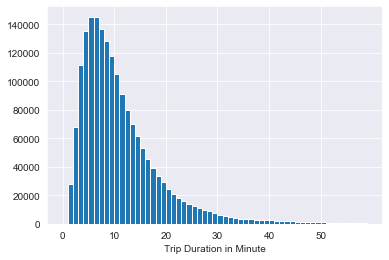

In [11]:
biketrip18_analysis['duration_min'] = biketrip18_analysis['duration_sec']/60
sb.set_style('darkgrid')
plt.hist(data=biketrip18_analysis, x='duration_min', bins=np.arange(0, 60, 1))
plt.xticks(np.arange(0, 60, 10))

plt.xlabel('Trip Duration in Minute')

## Visualization 2: Difference of trip duration by user type

Trip duration varies clearly with user type. The average of trip duration of customers is about 20 minutes longer than the one of subscribers. In this sense, we can predict that subscribers use bikes for shorter trips. 

Text(0.5, 0, 'Minuets')

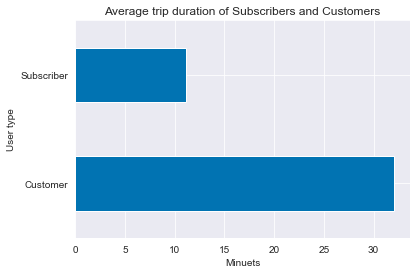

In [13]:
ave_min_user = biketrip18_analysis.groupby('user_type')['duration_min'].mean().plot(kind='barh', color = sb.color_palette('colorblind')[0])
ave_min_user.set_title('Average trip duration of Subscribers and Customers')
ave_min_user.set_ylabel('User type')
ave_min_user.set_xlabel('Minuets')

## Visualization 3: Patterns of duration by user type through a week

Subscribers' duration minuyes are much shorter than customers' on each day a week. On the other hand, there is a common point for both user types. Trip duration of both user types increases on weekends. Customers' trip duration varies slightly while subscribers show stable trip duration through weekdays. 

Text(0, 0.5, 'Duration in Minute')

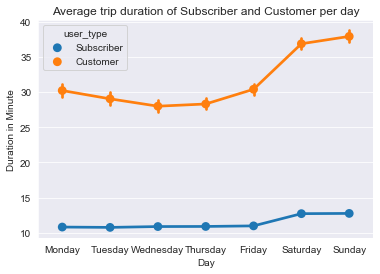

In [15]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daycat = pd.api.types.CategoricalDtype(ordered=True, categories=day)
biketrip18_analysis['start_day'] = biketrip18_analysis['start_day'].astype(daycat)

sb.pointplot(data=biketrip18_analysis, x='start_day', y='duration_min', hue='user_type', linestyles="solid")
plt.title('Average trip duration of Subscriber and Customer per day')
plt.xlabel('Day')
plt.ylabel('Duration in Minute')

## Conclusion
It can be seen that customers' and subscribers' trip duration has the similar pattern of changes through a week even though their average duration minuets are significantly different.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!